In [11]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head(10)

,episode 1,episode 2,episode 3,episode 4,episode 5,episode 6,episode 7,episode 8
abandoned,1,0,0,0,1,0,0,0
abilities,0,0,1,0,1,0,0,0
ability,0,1,1,1,1,2,0,1
ablaze,0,0,1,0,0,0,0,0
able,0,1,2,1,0,1,1,1
abominable,0,0,0,1,0,0,0,0
abomination,0,0,0,0,0,0,0,1
abominations,0,0,1,0,0,0,0,1
absolutely,0,0,0,1,0,0,0,0
academy,1,0,2,0,0,0,0,0


In [12]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

#it loops over each column in the data DataFrame, and for each column(a column means a comedian name),
# it sorts the values in descending order and selects the top 30 values. 
#The column name and the top 30 values (index and value) are stored as a tuple
# in a list, which is then assigned to the key in the top_dict dictionary 
#corresponding to the column name.


#In the end, top_dict will be a dictionary where each key is a column name 
#in the data DataFrame, and its value is a list of tuples, where each tuple 
#contains the index and value of one of the top 30 values for that column.

{'episode 1': [('im', 32),
  ('wednesday', 29),
  ('dont', 25),
  ('youre', 24),
  ('nevermore', 23),
  ('know', 18),
  ('like', 17),
  ('school', 17),
  ('did', 15),
  ('just', 14),
  ('way', 13),
  ('want', 13),
  ('going', 13),
  ('ive', 12),
  ('right', 12),
  ('mother', 12),
  ('thing', 12),
  ('oh', 12),
  ('tell', 11),
  ('got', 11),
  ('little', 11),
  ('people', 11),
  ('need', 10),
  ('time', 10),
  ('love', 10),
  ('rowan', 10),
  ('gonna', 9),
  ('uh', 8),
  ('girl', 8),
  ('thats', 8)],
 'episode 2': [('im', 28),
  ('wednesday', 23),
  ('like', 22),
  ('dont', 18),
  ('rowan', 17),
  ('know', 17),
  ('just', 16),
  ('youre', 13),
  ('thing', 13),
  ('come', 12),
  ('cup', 11),
  ('poe', 11),
  ('want', 11),
  ('need', 10),
  ('ive', 10),
  ('think', 10),
  ('bianca', 9),
  ('scales', 9),
  ('good', 9),
  ('tell', 8),
  ('right', 8),
  ('got', 8),
  ('hes', 8),
  ('sheriff', 8),
  ('yeah', 7),
  ('monster', 7),
  ('weems', 7),
  ('mother', 7),
  ('lets', 7),
  ('didnt', 7)]

In [13]:
# Print the top 15 words said by each comedian
for episode, top_words in top_dict.items():
    print(episode)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

#This code snippet seems to be trying to print the top words for each comedian
# in a dictionary called "top_dict". The dictionary's keys are the names of the
# comedians and the values are lists of words and their count.

#For each comedian, the code uses a for loop to extract the top 14 words and 
#their count from the list of words. The words are then joined together into 
#a single string separated by commas and brackets are added around the 
#comedian's name. The code then prints the resulting string along with a separator ("---").

episode 1
im, wednesday, dont, youre, nevermore, know, like, school, did, just, way, want, going, ive
---
episode 2
im, wednesday, like, dont, rowan, know, just, youre, thing, come, cup, poe, want, need
---
episode 3
know, im, dont, crackstone, youre, like, just, want, monster, yeah, hey, meeting, house, think
---
episode 4
im, wednesday, dont, like, come, know, dance, just, thats, eugene, raven, got, going, youre
---
episode 5
garrett, wednesday, dont, father, im, know, did, right, mother, got, gates, like, didnt, come
---
episode 6
know, like, just, dont, wednesday, youre, want, im, oh, gates, birthday, right, think, goody
---
episode 7
im, know, hyde, just, wednesday, dont, like, right, need, ill, monster, youve, diary, thing
---
episode 8
wednesday, tyler, im, youre, know, weems, dont, just, thing, hyde, thats, nevermore, time, got
---


In [14]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

#. The "Counter" class in the "collections" module is a dict subclass for
# counting hashable objects. It is often used for keeping track of the number
# of occurrences of elements in a list, tuple, or any other iterable.

#>>> from collections import Counter
#>>> c = Counter([1,1,2,3,4,5,3,2,3,4,2,1,2,3])
#>>> print(c)
#Counter({2: 4, 3: 4, 1: 3, 4: 2, 5: 1})

# Let's first pull out the top 30 words for each comedian
words = []
for episode in data.columns:
    top = [word for (word, count) in top_dict[episode]]
    for t in top:
        words.append(t)
        
words

['im',
 'wednesday',
 'dont',
 'youre',
 'nevermore',
 'know',
 'like',
 'school',
 'did',
 'just',
 'way',
 'want',
 'going',
 'ive',
 'right',
 'mother',
 'thing',
 'oh',
 'tell',
 'got',
 'little',
 'people',
 'need',
 'time',
 'love',
 'rowan',
 'gonna',
 'uh',
 'girl',
 'thats',
 'im',
 'wednesday',
 'like',
 'dont',
 'rowan',
 'know',
 'just',
 'youre',
 'thing',
 'come',
 'cup',
 'poe',
 'want',
 'need',
 'ive',
 'think',
 'bianca',
 'scales',
 'good',
 'tell',
 'right',
 'got',
 'hes',
 'sheriff',
 'yeah',
 'monster',
 'weems',
 'mother',
 'lets',
 'didnt',
 'know',
 'im',
 'dont',
 'crackstone',
 'youre',
 'like',
 'just',
 'want',
 'monster',
 'yeah',
 'hey',
 'meeting',
 'house',
 'think',
 'joseph',
 'wednesday',
 'right',
 'pilgrim',
 'thing',
 'oh',
 'hes',
 'world',
 'town',
 'did',
 'believe',
 'kind',
 'come',
 'girl',
 'doing',
 'got',
 'im',
 'wednesday',
 'dont',
 'like',
 'come',
 'know',
 'dance',
 'just',
 'thats',
 'eugene',
 'raven',
 'got',
 'going',
 'youre',

In [15]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

#like apperas 12 times means likes is one of the most common usd word by each comedian

[('im', 8),
 ('wednesday', 8),
 ('dont', 8),
 ('youre', 8),
 ('know', 8),
 ('like', 8),
 ('just', 8),
 ('right', 7),
 ('thing', 7),
 ('did', 6),
 ('want', 6),
 ('got', 6),
 ('come', 6),
 ('didnt', 6),
 ('mother', 5),
 ('oh', 5),
 ('need', 5),
 ('thats', 5),
 ('nevermore', 4),
 ('going', 4),
 ('time', 4),
 ('yeah', 4),
 ('okay', 4),
 ('gates', 4),
 ('school', 3),
 ('ive', 3),
 ('think', 3),
 ('hes', 3),
 ('monster', 3),
 ('xavier', 3),
 ('way', 2),
 ('tell', 2),
 ('rowan', 2),
 ('uh', 2),
 ('girl', 2),
 ('weems', 2),
 ('lets', 2),
 ('crackstone', 2),
 ('eugene', 2),
 ('ill', 2),
 ('make', 2),
 ('family', 2),
 ('hyde', 2),
 ('kinbott', 2),
 ('little', 1),
 ('people', 1),
 ('love', 1),
 ('gonna', 1),
 ('cup', 1),
 ('poe', 1),
 ('bianca', 1),
 ('scales', 1),
 ('good', 1),
 ('sheriff', 1),
 ('hey', 1),
 ('meeting', 1),
 ('house', 1),
 ('joseph', 1),
 ('pilgrim', 1),
 ('world', 1),
 ('town', 1),
 ('believe', 1),
 ('kind', 1),
 ('doing', 1),
 ('dance', 1),
 ('raven', 1),
 ('goo', 1),
 ('thoug

In [16]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['im', 'wednesday', 'dont', 'youre', 'know', 'like', 'just', 'right', 'thing']

In [17]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = list(text.ENGLISH_STOP_WORDS).append(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))

# The pickle.dump function is used to serialize an object and save it to disk 
#as a binary file. The first line of code uses pickle.dump to serialize the cv
#object and save it to a file named "cv_stop.pkl".

data_stop.to_pickle("dtm_stop.pkl")

In [18]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

#The WordCloud class generates a word cloud image from a given text. 
#The stopwords parameter is set to the stop_words variable and is used to 
#specify a list of stop words to be excluded from the word cloud. 
#The background_color parameter is set to "white" to specify the background 
#color of the word cloud image. The colormap parameter is set to "Dark2" and
# is used to specify the color palette for the word cloud. The max_font_size
# parameter is set to 150 and determines the maximum font size for the words 
#in the word cloud. The random_state parameter is set to 42 and is used to seed
# the random number generator to produce reproducible results.


In [19]:
# Reset the output dimensions
import os
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

#plt.rcParams is a dictionary-like object that holds all default parameters
#for Matplotlib, and 'figure.figsize' is one of those parameters, which 
#determines the default size of a figure. The code sets the default size of
# a figure to 16 inches wide and 6 inches tall.

episodes=[]
for i in range(8):
    episodes.append(f"episode {i+1}")
# Create subplots for each comedian
for index, episode in enumerate(data.columns):
    wc.generate(data_clean.transcript[episode])
    
    plt.subplot(3,4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(episodes[index])
folder_name = "results"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the plot in the "results" folder
file_name = "Wordcloud.png"  # Specify the desired file name and extension
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)

# Close the plot
plt.close()

# first uses the enumerate function to loop through the columns of the dataframe,
# where each column is a transcript for a different comedian. It then generates
# a word cloud for each transcript using the "wc.generate()" method, where "wc"
# is an instance of a word cloud generator. 

In [20]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(episodes, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

#The code creates a list unique_list of unique words for each comedian in the 
#data dataframe, where data is assumed to have comedian names as columns. The 
#unique word count is obtained by converting each comedian's data to a numpy array, 
#then counting the non-zero values in that array. The resulting unique_list is 
#then combined with the full_names list (which is assumed to be defined elsewhere)
#into a new dataframe data_words with two columns, 'comedian' and 'unique_words', 
#which is then sorted by 'unique_words' in ascending order and stored in
#data_unique_sort.

,comedian,unique_words
7,episode 8,895
5,episode 6,908
3,episode 4,1019
6,episode 7,1040
1,episode 2,1099
2,episode 3,1123
4,episode 5,1151
0,episode 1,1314


In [21]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for episode in data.columns:
    totals = sum(data[episode])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [59,48,48,49,52,50,47,52]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
7,episode 8,895,1710,52,32.884615
5,episode 6,908,1731,50,34.620000
3,episode 4,1019,1918,49,39.142857
6,episode 7,1040,1882,47,40.042553
0,episode 1,1314,2418,59,40.983051
4,episode 5,1151,2144,52,41.230769
2,episode 3,1123,2015,48,41.979167
1,episode 2,1099,2021,48,42.104167


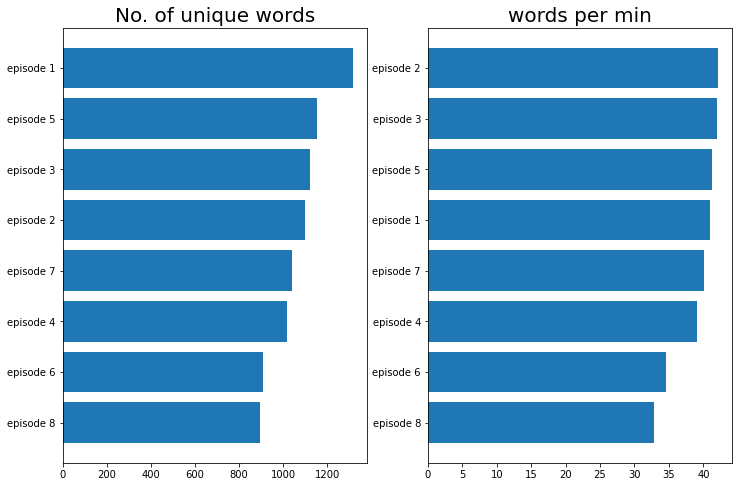

In [22]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))
fig = plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('No. of unique words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('words per min', fontsize=20)
file_name = "words.png"  # Specify the desired file name and extension
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')
file_path = os.path.join(folder_name, file_name)
plt.savefig(file_path)

plt.show()

In [23]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('im', 8),
 ('wednesday', 8),
 ('dont', 8),
 ('youre', 8),
 ('know', 8),
 ('like', 8),
 ('just', 8),
 ('right', 7),
 ('thing', 7),
 ('did', 6),
 ('want', 6),
 ('got', 6),
 ('come', 6),
 ('didnt', 6),
 ('mother', 5),
 ('oh', 5),
 ('need', 5),
 ('thats', 5),
 ('nevermore', 4),
 ('going', 4),
 ('time', 4),
 ('yeah', 4),
 ('okay', 4),
 ('gates', 4),
 ('school', 3),
 ('ive', 3),
 ('think', 3),
 ('hes', 3),
 ('monster', 3),
 ('xavier', 3),
 ('way', 2),
 ('tell', 2),
 ('rowan', 2),
 ('uh', 2),
 ('girl', 2),
 ('weems', 2),
 ('lets', 2),
 ('crackstone', 2),
 ('eugene', 2),
 ('ill', 2),
 ('make', 2),
 ('family', 2),
 ('hyde', 2),
 ('kinbott', 2),
 ('little', 1),
 ('people', 1),
 ('love', 1),
 ('gonna', 1),
 ('cup', 1),
 ('poe', 1),
 ('bianca', 1),
 ('scales', 1),
 ('good', 1),
 ('sheriff', 1),
 ('hey', 1),
 ('meeting', 1),
 ('house', 1),
 ('joseph', 1),
 ('pilgrim', 1),
 ('world', 1),
 ('town', 1),
 ('believe', 1),
 ('kind', 1),
 ('doing', 1),
 ('dance', 1),
 ('raven', 1),
 ('goo', 1),
 ('thoug